In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
#Importation de la fonction train_test_split
from sklearn.model_selection import train_test_split
#Importe le modèle KNeighbors
from sklearn.neighbors import KNeighborsClassifier
#Importe le cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
#Importe gridSearchCV
from sklearn.model_selection import GridSearchCV
#importe confusion_matrix
from sklearn.metrics import confusion_matrix
#Importe learning curve
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
#import kfold
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold
#importe leave one out
from sklearn.model_selection import LeaveOneOut

(150, 4)


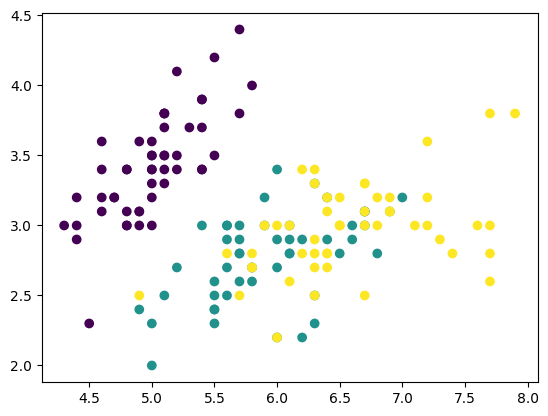

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y)

#### KFOLD

Bon pour les régressions car déséquilibres de classes

Découpe le dataset en x parties égales

On peut utiliser leave one out: le teste validation = 1 donnée(donc cv = nombre de données) ATTENTION: demande énormémentde puissance calcul

In [10]:
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Shuffle split

On mélange le dataset, on le divise en 2 selon un pourcentage, et on recommence ces deux actions x fois



In [12]:
#Function(nombre de fois, test_size = taille du validatrion set)
cv = ShuffleSplit(4, test_size=0.2)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)


array([1.        , 0.93333333, 0.93333333, 1.        ])

#### Stratified KFold

Ce qui est le meilleur dans la plupart des cas

Utilise une petite partie de chaque classe dans chaque set

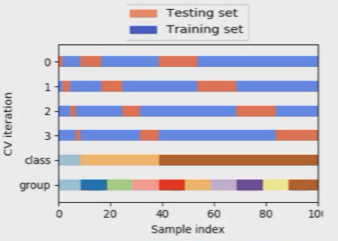

In [14]:
#Nombre de division du set
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

#### Group KFold

Lorsque les données ont une relation entre elles(ex: patient 1 et patient 2 sont de la même famille, correlation de maladie)

In [17]:
cv = GroupKFold(5).get_n_splits(x, y, groups=X[:, 0])
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

NameError: name 'x' is not defined